In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
secretNumber='100101'

In [3]:
circuit=QuantumCircuit(8,7)
#One helper cubit, we will never measure that helper qubit but that will help us handel our Opperations
#No of Qubits= length(SecretNumber+1)

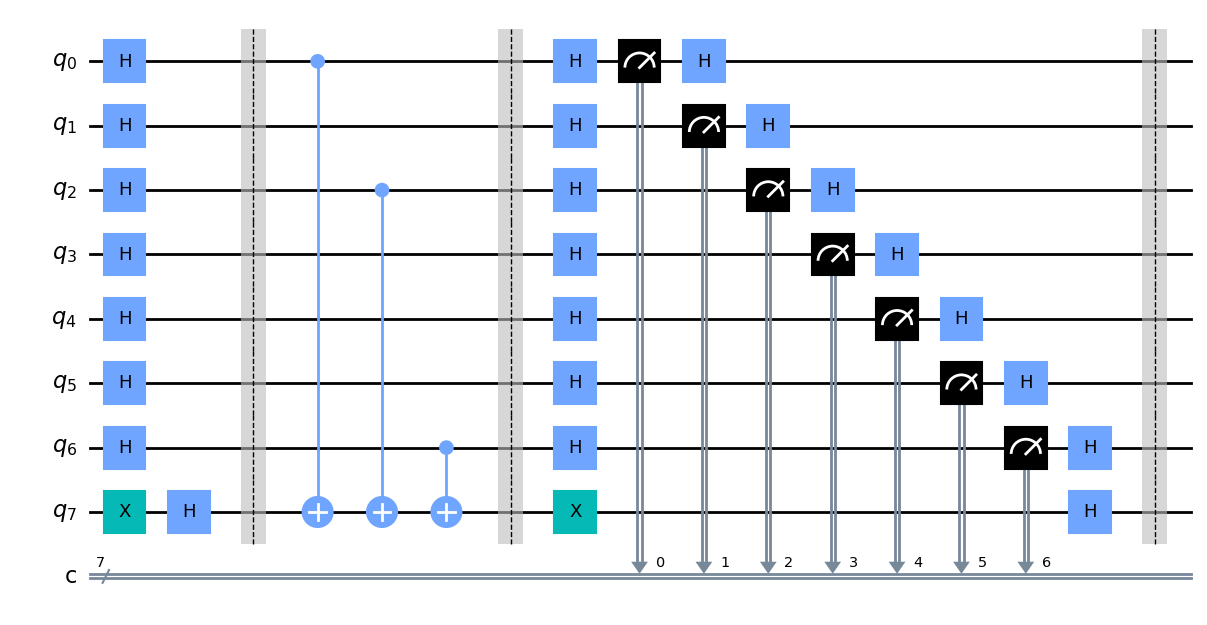

In [10]:
#Step 1: Apply H gate on all gates except the helper qubit
circuit.h([0,1,2,3,4,5,6])
circuit.x(7)  # If we skip this then we will get our answer 50% time, super position
circuit.h(7)  # If we skip this then we will get our answer 50% time, super position

circuit.barrier()
circuit.draw(output='mpl')

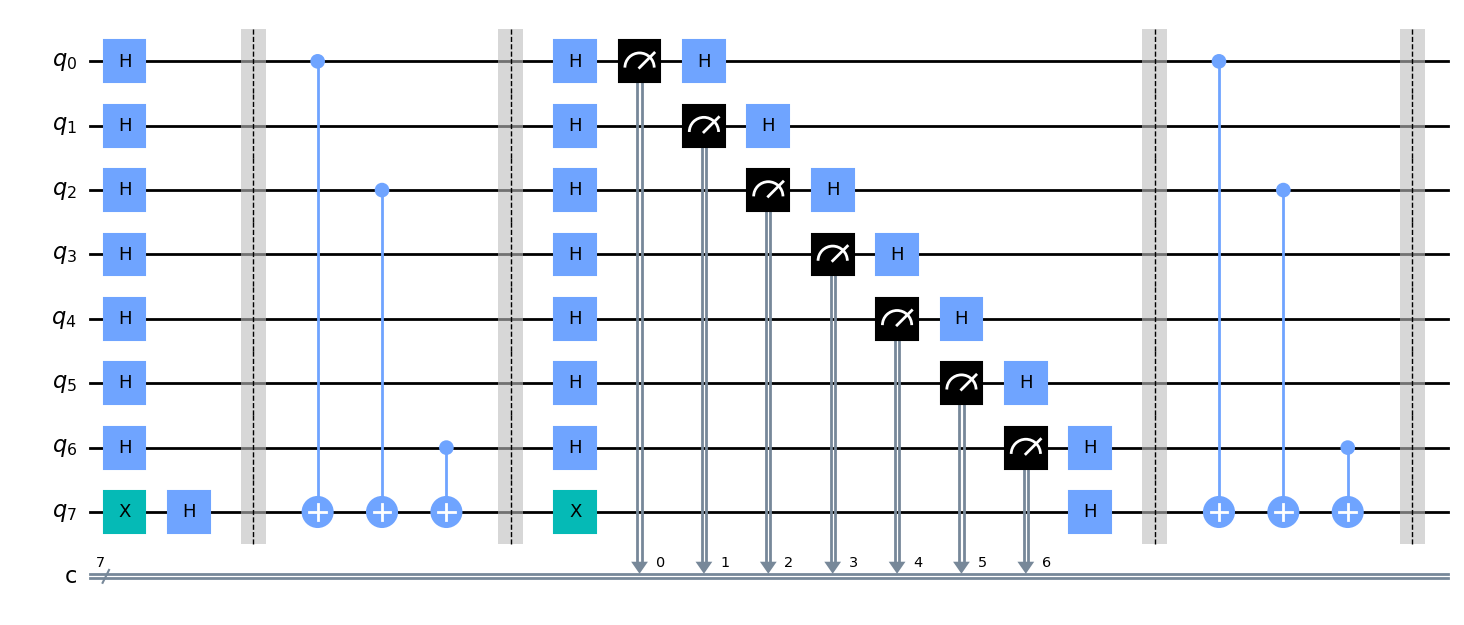

In [11]:
#Step 2, we need to apply cNOT gate on the qubits that will have the value 1 
#        and the unselective which is 8th Qubit 
circuit.cx(0,7)
circuit.cx(2,7)
circuit.cx(6,7)
circuit.barrier()

circuit.draw(output='mpl')

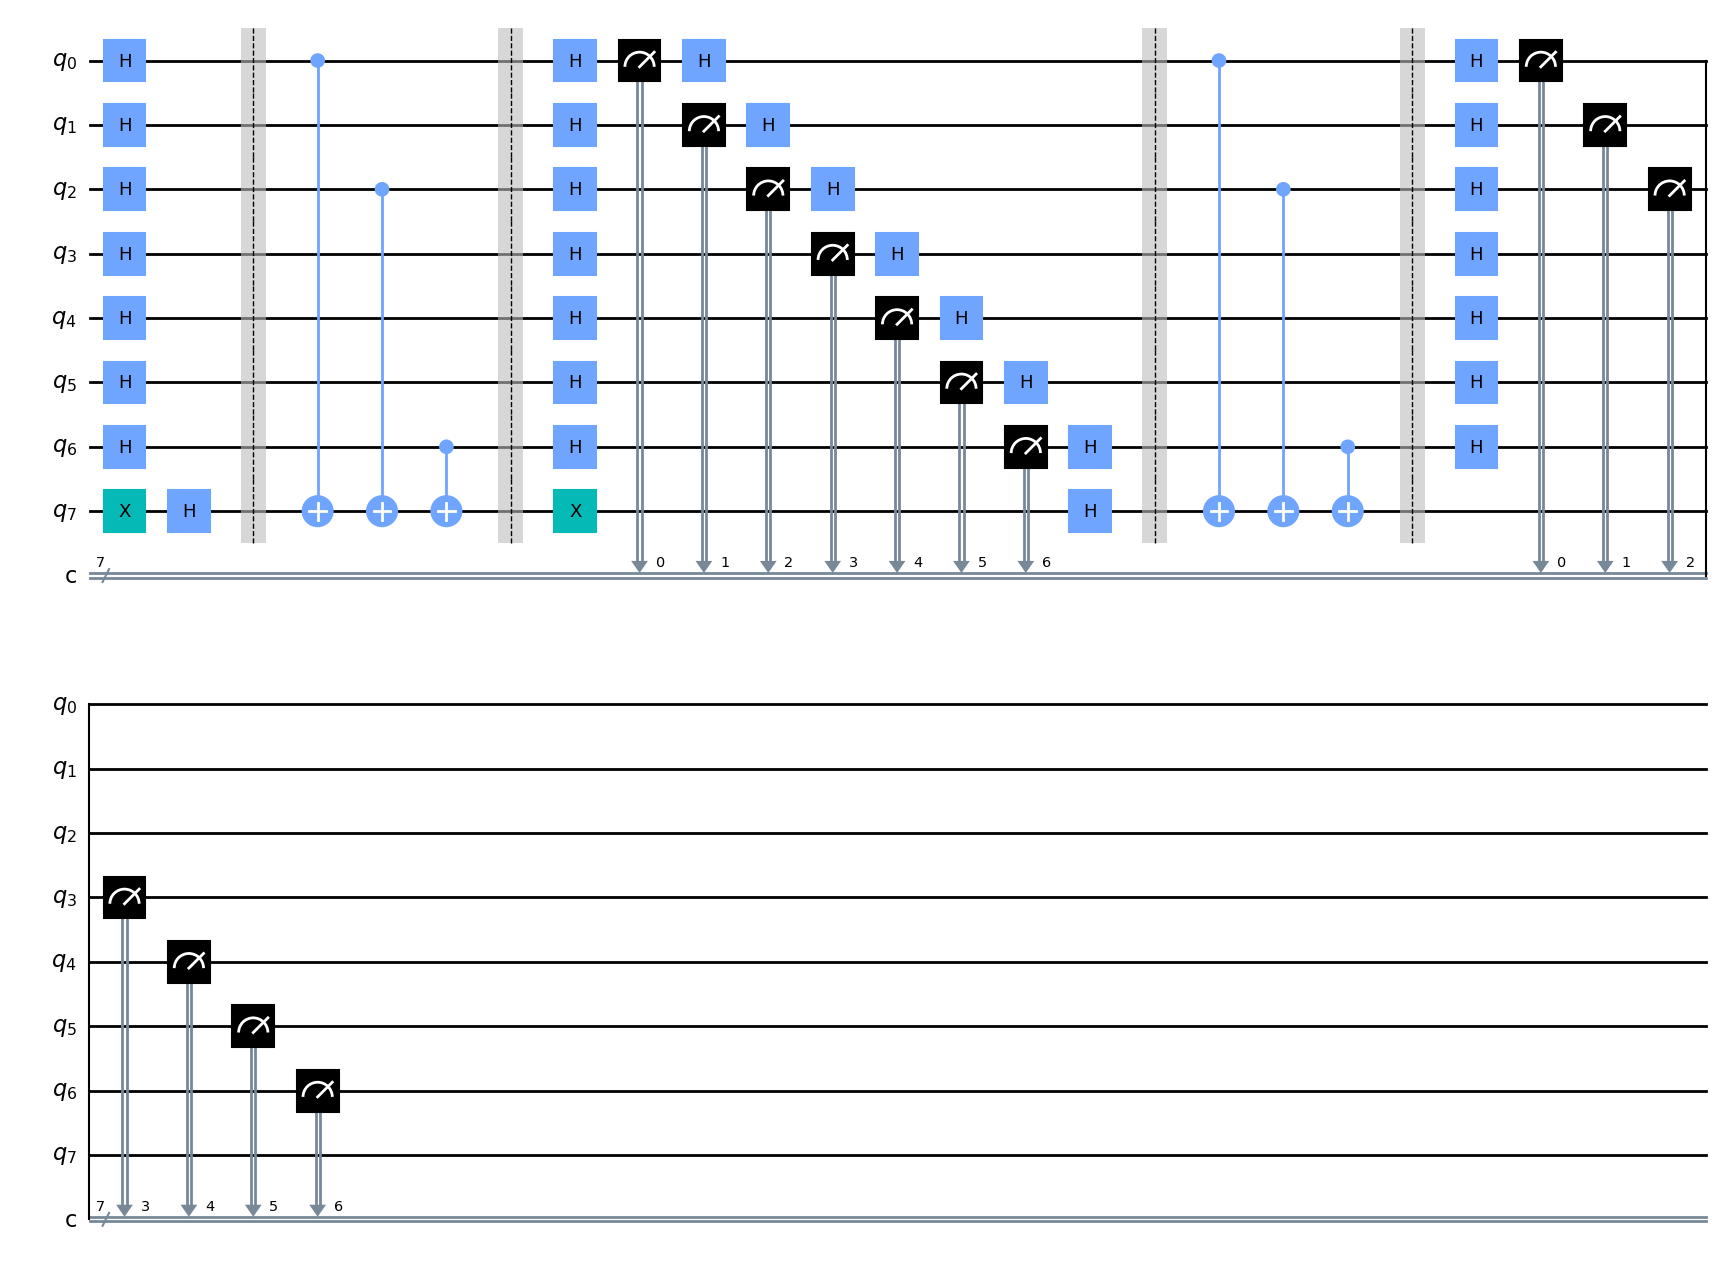

In [12]:
circuit.h([0,1,2,3,4,5,6])
circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])
circuit.draw(output='mpl')

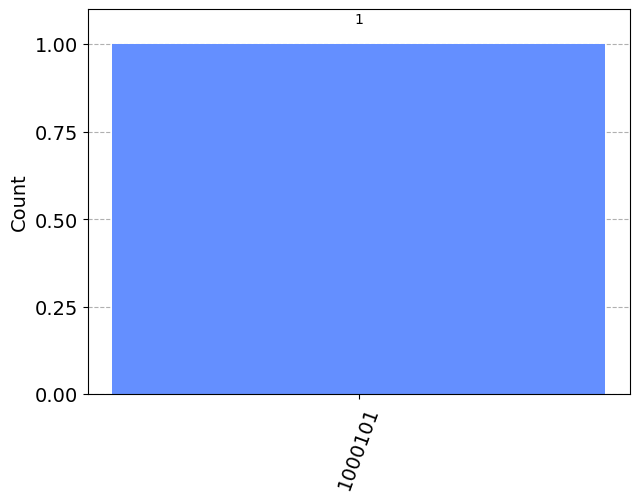

In [13]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator,shots=1).result()
counts=result.get_counts()
plot_histogram([counts])

In [14]:
print(counts)

{'1000101': 1}
